In [ ]:
#|default_exp interactive_visualization

# About interactive visualization using cloud storage

> The amazing possibilities of Jupyter ipywidgets and cloud storage 


The whole point of doing all this is of course to be able to communicate the results of data processing in as rich a manner as possible.  We have saved the calculated element maps in our datastack file. With the `multi_plot()` function one can create an overview plot with just a few lines of of code. 

In [ ]:
#|hide  

%load_ext autoreload
%autoreload 2 
%matplotlib notebook

In [ ]:
#|code-fold: true 
import os 
import numpy as np 
import matplotlib.pyplot as plt 

from maxrf4u import DataStack, multi_plot 
import skimage.exposure as ske 

<IPython.core.display.Javascript object>


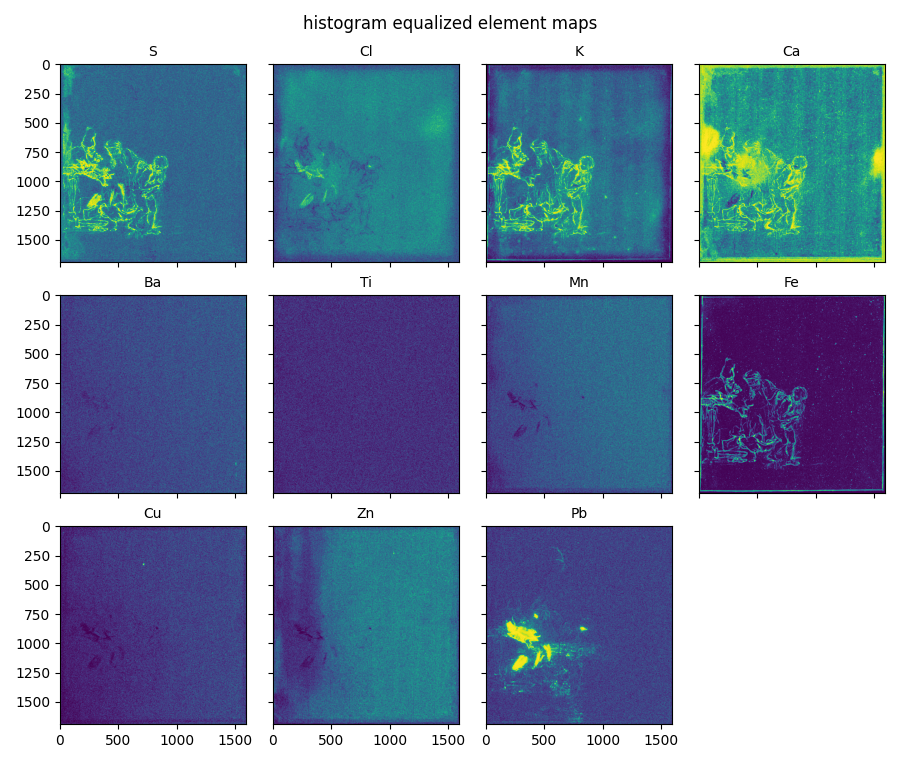

In [ ]:
#|code-fold: true  
os.chdir('/home/frank/Work/Projecten/DoRe/viz/raw_nmf')
datastack_file = 'RP-T-1898-A-3689.datastack' 
ds = DataStack(datastack_file)

elements = ds.read('nmf_elements')
element_maps = ds.read('nmf_elementmaps')
element_maps_histeq = [ske.equalize_hist(m) for m in element_maps]

fig, axs = multi_plot(*element_maps_histeq, titles=elements)
fig.suptitle('histogram equalized element maps')
plt.tight_layout()

Now I would like to share and explore this result with my colleagues and the rest of the world. Of course, one could save this plot in a low resolution overview image and share by email, or perhaps create a zip folder with high resolution images and send by Wetransfer. Rather unsatisfactory, clumsy, inefficient. In my experience, when exploring data each new thought requires yet another view of the same data. In some cases this is just a matter of zooming in to a specific location on the map, in other cases one might need to adjust contrast, mark locations etcetera. All of this is easy when one knows how to use Python and is sitting behind the same computer. However, I am aware that most of my colleagues can not program Python, and have other problems in life that they would like to solve first. 

> **For effective data exploration within interdisciplinary teams, being able to easily create interactive web based visualizations is paramount.**   

In the scientific Python community the need for interactive web based data visualization has since long been well understood. In these last years a rich ecosystem of open source web visualization tools has been developed. Two important Python packages that allow easy creation of interactive web *dashboards* are [ipywidgets](https://ipywidgets.readthedocs.io/en/stable/) and [ipyleaflet](https://ipyleaflet.readthedocs.io/en/latest/map_and_basemaps/map.html). My code here is makes use of these packages. 

Of course, one can only create web visualizations if one has the possibility to directly publish content on the web. Github offers free webhosting for nerds. These documentation pages you are reading are published via github. However, github is a version control system for code and not suitable to publish large amounts of image data. Better suited is cloud storage. In my case I acquired cloud storage from [backblaze.com](https://www.backblaze.com/). The price for storing files is very cheap: \$0.005 GB/Month. Cloud storage is organized in so-called buckets. Files within those buckets can be loaded into web pages. A convenient way to upload files to a web bucket is to mount the bucket into the computer's file system using a command line tool called `rclone`. 

Enough talk for now. Below I will show you how to create an interactive visualization. Starting point is the histogram equalized element maps for the eleven elements.   

In [ ]:
#|code-fold: true 
from maxrf4u import DataStack, multi_plot 
import skimage.exposure as ske 

In [ ]:
#|code-fold: true 
datastack_file = 'RP-T-1898-A-3689.datastack' 
ds = DataStack(datastack_file)

elements = ds.read('nmf_elements')
element_maps = ds.read('nmf_elementmaps')
element_maps_histeq = [ske.equalize_hist(m) for m in element_maps] # improve contrast 

Let's start by preparing standard filenames for the jpeg images that will be used in the visualization using the `make_filenames()` function.  

In [ ]:
from maxrf4u import make_filenames 

In [ ]:
objnr = 'RP-T-1898-A-3689' 
viztype = 'histeq_elementmap' 
ext = 'jpg'

filenames = make_filenames(objnr, viztype, elements, ext)
filenames 

['RP-T-1898-A-3689_histeq_elementmap_S.jpg',
 'RP-T-1898-A-3689_histeq_elementmap_Cl.jpg',
 'RP-T-1898-A-3689_histeq_elementmap_K.jpg',
 'RP-T-1898-A-3689_histeq_elementmap_Ca.jpg',
 'RP-T-1898-A-3689_histeq_elementmap_Ba.jpg',
 'RP-T-1898-A-3689_histeq_elementmap_Ti.jpg',
 'RP-T-1898-A-3689_histeq_elementmap_Mn.jpg',
 'RP-T-1898-A-3689_histeq_elementmap_Fe.jpg',
 'RP-T-1898-A-3689_histeq_elementmap_Cu.jpg',
 'RP-T-1898-A-3689_histeq_elementmap_Zn.jpg',
 'RP-T-1898-A-3689_histeq_elementmap_Pb.jpg']

A next step is to create an standard image upload directory object and upload the images to the cloud storage. This is done with the `UploadDir()` function and `.imsave()` method.  

In [ ]:
from maxrf4u import UploadDir 

In [ ]:
bucket_url = 'https://f002.backblazeb2.com/file/dore-viz' 
mount_dir = '/media/frank/b2/dore-viz/' 

uplink = UploadDir(mount_dir, objnr, bucket_url, subdir='images')

Created online images folder: https://f002.backblazeb2.com/file/dore-viz/RP-T-1898-A-3689/images


In [ ]:
img_urls = uplink.imsave(element_maps_histeq, filenames) 

Saving 11 images to folder: https://f002.backblazeb2.com/file/dore-viz/RP-T-1898-A-3689/images


https://f002.backblazeb2.com/file/dore-viz/RP-T-1898-A-3689/images/RP-T-1898-A-3689_histeq_elementmap_S.jpg
https://f002.backblazeb2.com/file/dore-viz/RP-T-1898-A-3689/images/RP-T-1898-A-3689_histeq_elementmap_Cl.jpg
https://f002.backblazeb2.com/file/dore-viz/RP-T-1898-A-3689/images/RP-T-1898-A-3689_histeq_elementmap_K.jpg
https://f002.backblazeb2.com/file/dore-viz/RP-T-1898-A-3689/images/RP-T-1898-A-3689_histeq_elementmap_Ca.jpg
https://f002.backblazeb2.com/file/dore-viz/RP-T-1898-A-3689/images/RP-T-1898-A-3689_histeq_elementmap_Ba.jpg
https://f002.backblazeb2.com/file/dore-viz/RP-T-1898-A-3689/images/RP-T-1898-A-3689_histeq_elementmap_Ti.jpg
https://f002.backblazeb2.com/file/dore-viz/RP-T-1898-A-3689/images/RP-T-1898-A-3689_histeq_elementmap_Mn.jpg
https://f002.backblazeb2.com/file/dore-viz/RP-T-1898-A-3689/images/RP-T-1898-A-3689_histeq_elementmap_Fe.jpg
https://f002.backblazeb2.com/file

Now that we have these images available online, we can build the interactive 'gridbox' visualization with the `make_gridbox_widget()` function, and save the the result as an html webpage with the `.export_interactive_html()` method. 

In [ ]:
from maxrf4u import make_gridbox_widget 

In [ ]:
gridbox = make_gridbox_widget(img_urls, titles=elements)

In [ ]:
uplink.export_interactive_html(gridbox, viztype='histeq_elementmap');

Saving interactive html to cloud storage...
Click link to load the interactive visualization (opens a separate page).

https://f002.backblazeb2.com/file/dore-viz/RP-T-1898-A-3689/html/RP-T-1898-A-3689_histeq_elementmap.html


<iframe src="https://f002.backblazeb2.com/file/dore-viz/RP-T-1898-A-3689/html/RP-T-1898-A-3689_histeq_elementmap.html" height="500" width="800"></iframe> 

<a href="https://f002.backblazeb2.com/file/dore-viz/RP-T-1898-A-3689/html/RP-T-1898-A-3689_histeq_elementmap.html">Click link to load the interactive visualization (opens a separate page).</a>

## FUNCTIONS 

In [ ]:
#|export 

import json 
import os 

import IPython 

from IPython.display import display
from IPython.display import Image
from IPython.display import HTML


from ipywidgets.embed import embed_minimal_html, embed_data 
from ipywidgets import Layout, HBox, VBox, GridBox, jslink, HTML 
from ipywidgets import Widget 

from ipyleaflet import (Map, projections, ImageOverlay, Rectangle, ZoomControl, FullScreenControl, 
                        DrawControl, WKTLayer, Popup)
import os 

import PIL
import urllib 
import numpy as np 
import matplotlib.pyplot as plt

In [ ]:
#|export 

class UploadDir(): 
    
    def __init__(self, mount_dir, objnr, bucket_url, subdir='images'):
        '''Creates a standard upload (image) directory object. '''
        
        self._mount_dir = mount_dir
        self._objnr = objnr 
        self._subdir = subdir 
        self._bucket_url = bucket_url 
        
        # check mount 
        assert os.path.isdir(mount_dir), f'Directory {mount_dir} was not found. Forgot to mount?' 

        # create subdirectory if needed  
        self._img_dir = os.path.join(mount_dir, objnr, subdir) 
        os.makedirs(self._img_dir, exist_ok=True)
        
        self._images_url = os.path.join(bucket_url, objnr, subdir)
        
        print(f'Created online images folder: {self._images_url}')

        
    def imsave(self, img_list, filename_list, verbose=True): 
        '''Save image arrays `img_list` as `filename_list` in cloud storage.  

        Returns: img_url_list 
        ''' 
        
        print(f'Saving {len(img_list)} images to folder: {self._images_url}')
        
        img_url_list = []
        for img, filename in zip(img_list, filename_list):   
            filepath = os.path.join(self._img_dir, filename) 
            
            # save to rclone mounted image folder 
            plt.imsave(filepath, img) 
            
            img_url = os.path.join(self._bucket_url, self._objnr, self._subdir, filename)
            img_url_list.append(img_url)
            
        if verbose: 
            print('\n')
            for img_url in img_url_list: 
                print(img_url)

        return img_url_list 
    
    
    def listdir(self, filepath=True): 
        '''List local (mounted) file paths for images subfolder. '''
        
        filenames = os.listdir(self._img_dir)
        
        # prefix filepath 
        if filepath:  
            filenames = [os.path.join(self._img_dir, fn) for fn in filenames] 
            
        return filenames 
    
    def listurls(self): 
        '''Construct image urls'''
        
        filename_list = os.listdir(self._img_dir)
        
        img_url_list = []
        for filenames in filename_list: 
            img_url = os.path.join(self._bucket_url, self._objnr, self._subdir, filename)
            img_url_list.append(img_url)
            
        return img_url_list 
    
    def export_interactive_html(self, widget, viztype): 
        '''Save `widget` as interactive html page in cloud storage.
        
        Returns: html_url'''
        
        # create html subdirectory if needed  
        html_dir = os.path.join(self._mount_dir, self._objnr, 'html') 
        os.makedirs(html_dir, exist_ok=True)
        
        html_filename = f'{self._objnr}_{viztype}.html' 
        html_filepath = os.path.join(html_dir, html_filename)
        html_url = os.path.join(self._bucket_url, self._objnr, 'html', html_filename)

        print(f'Saving interactive html to cloud storage...')
        embed_minimal_html(html_filepath, widget)
        print('Click link to load the interactive visualization (opens a separate page).\n')

        print(html_url)
        
        return html_url 
        
    
    
def make_filenames(objnr, viztype, titles, ext): 
    '''Creates standard filenames. 
    
    Returns: filenames
    '''
    
    filenames = []
    for t in titles: 
        fname = f'{objnr}_{viztype}_{t}.{ext}'
        filenames.append(fname)
    
    return filenames




def make_gridbox_widget(img_urls, titles, shape=None): 
    '''Creates multi-image interactive synchronized viewer. '''
    
    # close all widgets to avoid ever growing html export file size  
    Widget.close_all()
    
    # if shape is not specified 
    # assume all images map onto shape of first image 
    if shape is None: 
        shape = np.array(PIL.Image.open(urllib.request.urlopen(img_urls[0]))).shape[0:2] # height, width 
        h, w = shape  

    map_layout = Layout(width='20vw', height='20vw')
    vbox_layout = Layout(width='20.5vw', height='20vw')
    grid_layout = Layout(grid_template_columns="repeat(5, 20.2vw)") 
    
    # make map widgets  
    
    map_widgets = [] 
    for url in img_urls:

        m = Map(center=[h/2, w/2], zoom=-4, crs=projections['Simple'], layout=map_layout, 
                    scroll_wheel_zoom=True, min_zoom=-5)#, interpolation='nearest')
        
        imo = ImageOverlay(url=url, bounds=[[0, 0], [h, w]]) # bounds= SW NE corners
        fsc = FullScreenControl()
        
        m.add(imo)
        m.add(fsc)
        m.remove(m.layers[0]) # hack to remove world map 
        
        map_widgets.append(m)
        
    # sync map widgets centers and zoom levels via browser javascript 
    first, rest = map_widgets[0], map_widgets[1:]
    for r in rest: 
        jslink([first, 'center'],[r, 'center'])
        jslink([first, 'zoom'],[r, 'zoom'])
    
    # titles 
    
    title_widgets = []
    for t in titles: 
        
        tw = HTML(f'<center><bf>{t}</bf></center>') # ? 
        title_widgets.append(tw)
    
    # combine titles and maps 
    vboxes = []
    for title_widget, map_widget in zip(title_widgets, map_widgets): 
        
        vbox = VBox([title_widget, map_widget], layout=vbox_layout)
        vboxes.append(vbox)
    
    gridbox = GridBox(vboxes, layout=grid_layout)
    
    return gridbox 

                       